In [1]:
from k_means_const_manhattan import KMeansConstrained
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

## Creating the delivery Locations

In [2]:
def create_locations(x, y, n):
    loc = []

    for _ in range(n):
        loc_x = random.randint(int(x[0]), int(y[0])) + random.randint(int((x[0] - int(x[0]))*10000), int((y[0] - int(y[0]))*10000)) / 10000
        loc_y = random.randint(int(x[1]), int(y[1])) + random.randint(int((x[1] - int(x[1]))*10000), int((y[1] - int(y[1]))*10000)) / 10000
        loc.append([loc_x,loc_y])
        
    return loc

In [3]:
def check_location(delivery_loc, border):
    euc_pts = []
    man_pts = []

    for loc in delivery_loc:
        if loc[0] <= border[0][0]:
            euc_pts.append(loc)
        else:
            man_pts.append(loc)

    return euc_pts, man_pts

## Visualizing the data

In [4]:
def initial_plot(delivery_loc, border):
    loc = np.array(delivery_loc)
    plt.scatter(loc[:,0], loc[:,1])
    # plot the border
    plt.plot((border[0][0],border[1][0]), (border[0][1],border[1][1]), c="black")
    plt.title("Delivery Locations")
    plt.show()

In [5]:
def clusters_plot(manhattan_clusters, euclidean_clusters, manhattan_centroids, euclidean_centroids, border):
    for i in manhattan_clusters:
        points = np.array(manhattan_clusters[i])
        plt.scatter(points[:,0], points[:,1])
        #try
        center = np.mean(points, axis=0)
        radius = max(np.linalg.norm(point - center) for point in points)

        # Plot the circle
        circle = plt.Circle(center, radius, color='lightblue', fill=True, alpha=0.5)
        plt.gca().add_artist(circle)
        #try
    for j in euclidean_clusters:
        points = np.array(euclidean_clusters[j])
        plt.scatter(points[:,0], points[:,1])
        #try
        center = np.mean(points, axis=0)
        radius = max(np.linalg.norm(point - center) for point in points)

        # Plot the circle
        circle = plt.Circle(center, radius, color='lightblue', fill=True, alpha=0.5)
        plt.gca().add_artist(circle)
        #try
    plt.scatter(manhattan_centroids[:,0], manhattan_centroids[:,1], marker='^', c="black")
    plt.scatter(euclidean_centroids[:,0], euclidean_centroids[:,1], marker='^', c="black")
    plt.plot((border[0][0],border[1][0]), (border[0][1],border[1][1]), c="black")
    plt.title("After Clustering")
    plt.show()

In [6]:
def dp_plot(euclidean_clusters,manhattan_clusters, centroids,border, dp):
    for i in manhattan_clusters:
        points = np.array(manhattan_clusters[i])
        plt.scatter(points[:,0], points[:,1])
        #try
        center = np.mean(points, axis=0)
        radius = max(np.linalg.norm(point - center) for point in points)

        # Plot the circle
        circle = plt.Circle(center, radius, color='lightblue', fill=True, alpha=0.5)
        plt.gca().add_artist(circle)
        #try
    for j in euclidean_clusters:
        points = np.array(euclidean_clusters[j])
        plt.scatter(points[:,0], points[:,1])
        #try
        center = np.mean(points, axis=0)
        radius = max(np.linalg.norm(point - center) for point in points)

        # Plot the circle
        circle = plt.Circle(center, radius, color='lightblue', fill=True, alpha=0.5)
        plt.gca().add_artist(circle)
        #try
    centroids = np.array(centroids)
    plt.scatter(centroids[:,0], centroids[:,1], marker='^', c="black")
    plt.plot((border[0][0],border[1][0]), (border[0][1],border[1][1]), c="black")
    plt.scatter(dp[0], dp[1], marker='+',s=200, c="red")
    plt.title("After DP Creation")
    plt.show()

In [7]:
def final_plot(euclidean_clusters, manhattan_clusters, border, centroids, dp):
    colors = ['blue', 'green', 'orange', 'purple', 'brown']

    for i in euclidean_clusters:
        pts = np.array(euclidean_clusters[i])
        plt.scatter(pts[:,0], pts[:,1])
        #try
        points = pts[1:-1,:]
        center = np.mean(points, axis=0)
        radius = max(np.linalg.norm(point - center) for point in points)

        # Plot the circle
        circle = plt.Circle(center, radius, color='lightblue', fill=True, alpha=0.5)
        plt.gca().add_artist(circle)
        #try

        for j in range(len(pts)-1):
            pt_1 = pts[j]
            pt_2 = pts[j+1]

            plt.plot((pt_1[0], pt_2[0]),(pt_1[1], pt_2[1]), c=colors[i % len(colors)])
            # plt.plot(t_pt, l_pt, c=colors[i % len(colors)])
        
    for i in manhattan_clusters:
        pts = np.array(manhattan_clusters[i])
        plt.scatter(pts[:,0], pts[:,1])
        #try
        points = pts[1:-1,:]
        center = np.mean(points, axis=0)
        radius = max(np.linalg.norm(point - center) for point in points)

        # Plot the circle
        circle = plt.Circle(center, radius, color='lightblue', fill=True, alpha=0.5)
        plt.gca().add_artist(circle)
        #try

        if dp[0]<border[0][0]:
            for j in range(1,len(pts)-2):
                pt_1 = pts[j]
                pt_2 = pts[j+1]

                # x axis
                f_pt = np.array([pt_1[0], pt_1[0]])
                s_pt = np.array([pt_1[1], pt_2[1]])

                # y axis
                t_pt = np.array([pt_1[0], pt_2[0]])
                l_pt = np.array([pt_2[1], pt_2[1]])

                plt.plot(f_pt, s_pt, c=colors[i % len(colors)])
                plt.plot(t_pt, l_pt, c=colors[i % len(colors)])

            plt.plot((pts[0][0],pts[1][0]),(pts[0][1],pts[1][1]), c=colors[i % len(colors)])
            plt.plot((pts[-2][0],pts[-1][0]),(pts[-2][1],pts[-1][1]), c=colors[i % len(colors)])
        else:
            for j in range(len(pts)-1):
                pt_1 = pts[j]
                pt_2 = pts[j+1]

                # x axis
                f_pt = np.array([pt_1[0], pt_1[0]])
                s_pt = np.array([pt_1[1], pt_2[1]])

                # y axis
                t_pt = np.array([pt_1[0], pt_2[0]])
                l_pt = np.array([pt_2[1], pt_2[1]])

                plt.plot(f_pt, s_pt, c=colors[i % len(colors)])
                plt.plot(t_pt, l_pt, c=colors[i % len(colors)])

    centroids = np.array(centroids)
    plt.scatter(dp[0], dp[1], c="red", marker='X',s=200)
    plt.scatter(centroids[:,0], centroids[:,1], marker='^', c="black")
    plt.plot((border[0][0],border[1][0]), (border[0][1],border[1][1]), c="black")
    plt.title("Final Result")
    plt.show()

## KMeans Clustering

In [8]:
def KMeans(delivery_loc, n, k):
    n_cluster = n//k if n%k == 0 else n//k + 1

    model = KMeansConstrained(n_clusters=n_cluster, size_min=1, size_max=k)
    model.fit_predict(np.array(delivery_loc))

    labels = model.labels_
    clusters = {label:[] for label in range(n_cluster)}

    for i in range(len(delivery_loc)):
        clusters[labels[i]].append(delivery_loc[i])

    return model.cluster_centers_, clusters

In [9]:
# from k_means_constrained import KMeansConstrained
import k_means_constrained

def KMeans_Euclidian(delivery_loc, n, k):
    n_cluster = n//k if n%k == 0 else n//k + 1

    model = k_means_constrained.KMeansConstrained(n_clusters=n_cluster, size_min=1, size_max=k)
    model.fit_predict(np.array(delivery_loc))

    labels = model.labels_
    clusters = {label:[] for label in range(n_cluster)}

    for i in range(len(delivery_loc)):
        clusters[labels[i]].append(delivery_loc[i])

    return model.cluster_centers_, clusters

## Calculate DP

In [10]:
def calculate_dp(centroids):
    x = [i for i,j in centroids]
    y = [j for i,j in centroids]

    loc_x = np.median(x)
    loc_y = np.median(y)

    return [loc_x, loc_y]

In [11]:
def gec(coordinates):
    x_sum = sum(loc[0] for loc in coordinates)
    y_sum = sum(loc[1] for loc in coordinates)
    x_cord = x_sum / len(coordinates)
    y_cord = y_sum / len(coordinates)

    return x_cord, y_cord

def ecmb(coordinate, border):
    longitude = 0
    latitude = 0
    k=border[0][0]
    # test = gec(coordinate)
    for loc in coordinate:
        if loc[0] <= k:
            longitude+= loc[0]
        else:
            longitude+= k
        latitude+= loc[1]
    x_axis = longitude/len(coordinate)
    y_axis = latitude/len(coordinate)
    return x_axis, y_axis

def calculate_manhattan_median(centroids):
    x = [i for i,j in centroids]
    y = [j for i,j in centroids]

    loc_x = np.median(x)
    loc_y = np.median(y)

    return loc_x, loc_y

def mmeb(customer_locations, border_position):
    R = border_position[0][0]

    euclidean_locations = [(x, y) for x, y in customer_locations if x <= R]
    manhattan_locations = [(x, y) for x, y in customer_locations if x > R]

    best_median_row = None
    best_median_column = None
    best_total_cost = math.inf

    possible_positions = np.linspace(border_position[0][1], border_position[1][1], num=100)

    # Iterate over possible distinct positions on the border
    for i in possible_positions:

        projected_euclidean = [(R, i) for _, _ in euclidean_locations]

        combined_customers = projected_euclidean + manhattan_locations

        median_row, median_column = calculate_manhattan_median(combined_customers)

        total_cost = sum(math.sqrt((x-R)**2 + (y-i)**2) for x,y in euclidean_locations) #cost from euclidian to border
        total_cost += sum(abs(x-median_row) + abs(y-median_column) for x,y in combined_customers) #cost from border to manhattan

        # Update the best result if the current position is better
        if total_cost < best_total_cost:
            best_border_point = projected_euclidean[0]
            best_total_cost = total_cost
            best_median_row = median_row
            best_median_column = median_column

    return best_border_point,[best_median_row, best_median_column],best_total_cost

## Traveling Salesman Problem

In [12]:
def calculate_manhattan_distance(point1, point2):
    return (abs(point1[0]-point2[0]) + abs(point1[1]-point2[1]))

In [13]:
def calculate_euclidean_distance(pt1, pt2):
    pt1 = np.array(pt1)
    pt2 = np.array(pt2)
    return np.sqrt(np.sum((pt2 - pt1)**2))

In [14]:
from itertools import permutations

def tsp_euc(cluster, dp, inter_point = None):
    path = list(permutations(cluster))
    cost = []
    # add dp at the start and end
    for i in range(len(path)):
        path[i] = list(path[i])
        path[i].insert(0,dp)
        if inter_point != None:
            path[i].insert(1,inter_point)
            path[i].append(inter_point)
        path[i].append(dp)
        
        # Calculate distance
        points = path[i]
        sum = 0

        for j in range(len(points)-1):
            sum += calculate_euclidean_distance(points[j], points[j+1])
        cost.append(sum)

    idx = np.argmin(cost)
    return path[idx]

In [15]:
def tsp_man(cluster, dp, inter_point = None):
    path = list(permutations(cluster))
    cost = []
    # add dp at the start and end
    for i in range(len(path)):
        path[i] = list(path[i])
        path[i].insert(0,dp)
        if inter_point != None:
            cur = path[i]
            path[i].insert(1,[inter_point, cur[1][1]])
            path[i].append([inter_point, cur[-1][1]])
        path[i].append(dp)
        
        # Calculate distance
        points = path[i]
        sum = 0

        for j in range(len(points)-1):
            sum += calculate_manhattan_distance(points[j], points[j+1])
        cost.append(sum)

    idx = np.argmin(cost)
    return path[idx]

## Main

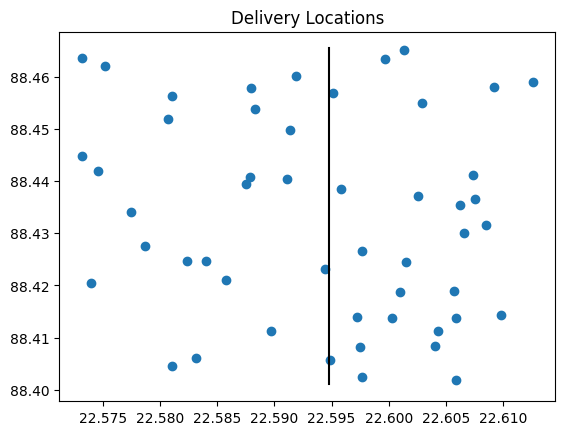

In [16]:
#no of delivery locations and drone capacity
n = 50
k = 5

# creating the boundary
x = [22.5726, 88.4010]
y = [22.6141, 88.4654]
border = [[22.5948, 88.4010],[22.5948, 88.4654]]
delivery_loc = create_locations(x, y, n)

# Visualize the data
initial_plot(delivery_loc,border)

In [17]:
# separating euclidean and manhattan points
euclidean_points, manhattan_points = check_location(delivery_loc, border)

print(len(euclidean_points), len(manhattan_points))

23 27


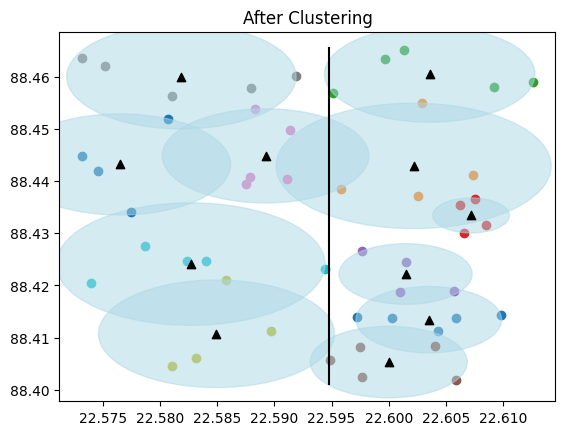

In [18]:
# Cluster the data and get the labels and centroids
manhattan_centroids, manhattan_clusters = KMeans(manhattan_points, len(manhattan_points), k)
euclidean_centroids, euclidean_clusters = KMeans(euclidean_points, len(euclidean_points), k)

# Visualize the data
clusters_plot(manhattan_clusters, euclidean_clusters, manhattan_centroids, euclidean_centroids, border)

In [19]:
centroids = (manhattan_centroids).tolist()+(euclidean_centroids).tolist()

centroids

[[22.6035, 88.41342],
 [22.602175, 88.44290000000001],
 [22.60358, 88.46046],
 [22.6072, 88.4334],
 [22.601475, 88.422175],
 [22.599999999999998, 88.4053],
 [22.58924, 88.44482],
 [22.581879999999998, 88.46],
 [22.58495, 88.410725],
 [22.5827, 88.42408],
 [22.5765, 88.443175]]

DP in manhattan region 
[22.599999999999998, 88.43352525252526]


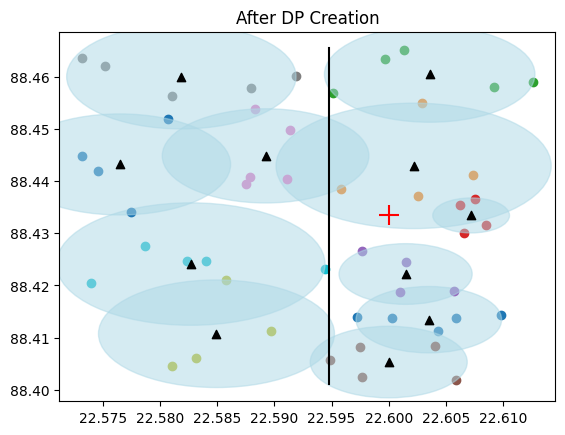

In [21]:
# Calculate DP
if (len(manhattan_centroids) >= len(euclidean_centroids)):
    print("DP in manhattan region ")
    inter_point,dp, distance = mmeb(centroids, border)
else:
    print("DP in euclidean region ")
    dp = ecmb(centroids, border)

print(dp)

# Visualize the data
dp_plot(euclidean_clusters,manhattan_clusters, centroids, border, dp)

In [22]:
# Shortest path calculation in each euclidean cluster
if dp[0] < border[0][0]:
    for i in euclidean_clusters:
        euclidean_clusters[i] = tsp_euc(euclidean_clusters[i], dp, inter_point = None)
else:
    for i in euclidean_clusters:
        euclidean_clusters[i] = tsp_euc(euclidean_clusters[i], dp, inter_point = inter_point)

euclidean_clusters

{0: [[22.599999999999998, 88.43352525252526],
  (22.5948, 88.43352525252526),
  [22.5911, 88.4404],
  [22.5914, 88.4498],
  [22.5883, 88.4538],
  [22.5879, 88.4407],
  [22.5875, 88.4394],
  (22.5948, 88.43352525252526),
  [22.599999999999998, 88.43352525252526]],
 1: [[22.599999999999998, 88.43352525252526],
  (22.5948, 88.43352525252526),
  [22.5811, 88.4563],
  [22.5752, 88.4621],
  [22.5732, 88.4636],
  [22.588, 88.4579],
  [22.5919, 88.4601],
  (22.5948, 88.43352525252526),
  [22.599999999999998, 88.43352525252526]],
 2: [[22.599999999999998, 88.43352525252526],
  (22.5948, 88.43352525252526),
  [22.5858, 88.421],
  [22.5811, 88.4045],
  [22.5832, 88.4061],
  [22.5897, 88.4113],
  (22.5948, 88.43352525252526),
  [22.599999999999998, 88.43352525252526]],
 3: [[22.599999999999998, 88.43352525252526],
  (22.5948, 88.43352525252526),
  [22.5944, 88.4232],
  [22.584, 88.4247],
  [22.5824, 88.4246],
  [22.574, 88.4204],
  [22.5787, 88.4275],
  (22.5948, 88.43352525252526),
  [22.59999999

In [23]:
# Shortest path calculation in each euclidean cluster
if dp[0] >= border[0][0]:
    for i in manhattan_clusters:
        manhattan_clusters[i] = tsp_man(manhattan_clusters[i], dp, inter_point = None)
else:
    for i in manhattan_clusters:
        manhattan_clusters[i] = tsp_man(manhattan_clusters[i], dp, inter_point = border[0][0])

manhattan_clusters

{0: [[22.599999999999998, 88.43352525252526],
  [22.5972, 88.414],
  [22.6003, 88.4138],
  [22.6043, 88.4113],
  [22.6059, 88.4137],
  [22.6098, 88.4143],
  [22.599999999999998, 88.43352525252526]],
 1: [[22.599999999999998, 88.43352525252526],
  [22.5958, 88.4385],
  [22.602899999999998, 88.4549],
  [22.6074, 88.4411],
  [22.6026, 88.4371],
  [22.599999999999998, 88.43352525252526]],
 2: [[22.599999999999998, 88.43352525252526],
  [22.5951, 88.4569],
  [22.5997, 88.4633],
  [22.6013, 88.4652],
  [22.6126, 88.4589],
  [22.6092, 88.458],
  [22.599999999999998, 88.43352525252526]],
 3: [[22.599999999999998, 88.43352525252526],
  [22.6062, 88.4354],
  [22.6075, 88.4365],
  [22.6085, 88.4316],
  [22.6066, 88.4301],
  [22.599999999999998, 88.43352525252526]],
 4: [[22.599999999999998, 88.43352525252526],
  [22.601, 88.4188],
  [22.6057, 88.4189],
  [22.6015, 88.4244],
  [22.5977, 88.4266],
  [22.599999999999998, 88.43352525252526]],
 5: [[22.599999999999998, 88.43352525252526],
  [22.604, 8

In [24]:
for i in euclidean_clusters:
    print("Path",i,":")
    for j in euclidean_clusters[i]:
        print(j,"->",end=" ")
    print("End")

Path 0 :
[22.599999999999998, 88.43352525252526] -> (22.5948, 88.43352525252526) -> [22.5911, 88.4404] -> [22.5914, 88.4498] -> [22.5883, 88.4538] -> [22.5879, 88.4407] -> [22.5875, 88.4394] -> (22.5948, 88.43352525252526) -> [22.599999999999998, 88.43352525252526] -> End
Path 1 :
[22.599999999999998, 88.43352525252526] -> (22.5948, 88.43352525252526) -> [22.5811, 88.4563] -> [22.5752, 88.4621] -> [22.5732, 88.4636] -> [22.588, 88.4579] -> [22.5919, 88.4601] -> (22.5948, 88.43352525252526) -> [22.599999999999998, 88.43352525252526] -> End
Path 2 :
[22.599999999999998, 88.43352525252526] -> (22.5948, 88.43352525252526) -> [22.5858, 88.421] -> [22.5811, 88.4045] -> [22.5832, 88.4061] -> [22.5897, 88.4113] -> (22.5948, 88.43352525252526) -> [22.599999999999998, 88.43352525252526] -> End
Path 3 :
[22.599999999999998, 88.43352525252526] -> (22.5948, 88.43352525252526) -> [22.5944, 88.4232] -> [22.584, 88.4247] -> [22.5824, 88.4246] -> [22.574, 88.4204] -> [22.5787, 88.4275] -> (22.5948, 88.

In [25]:
for i in manhattan_clusters:
    print("Path",i,":")
    for j in manhattan_clusters[i]:
        print(j,"->",end=" ")
    print("End")

Path 0 :
[22.599999999999998, 88.43352525252526] -> [22.5972, 88.414] -> [22.6003, 88.4138] -> [22.6043, 88.4113] -> [22.6059, 88.4137] -> [22.6098, 88.4143] -> [22.599999999999998, 88.43352525252526] -> End
Path 1 :
[22.599999999999998, 88.43352525252526] -> [22.5958, 88.4385] -> [22.602899999999998, 88.4549] -> [22.6074, 88.4411] -> [22.6026, 88.4371] -> [22.599999999999998, 88.43352525252526] -> End
Path 2 :
[22.599999999999998, 88.43352525252526] -> [22.5951, 88.4569] -> [22.5997, 88.4633] -> [22.6013, 88.4652] -> [22.6126, 88.4589] -> [22.6092, 88.458] -> [22.599999999999998, 88.43352525252526] -> End
Path 3 :
[22.599999999999998, 88.43352525252526] -> [22.6062, 88.4354] -> [22.6075, 88.4365] -> [22.6085, 88.4316] -> [22.6066, 88.4301] -> [22.599999999999998, 88.43352525252526] -> End
Path 4 :
[22.599999999999998, 88.43352525252526] -> [22.601, 88.4188] -> [22.6057, 88.4189] -> [22.6015, 88.4244] -> [22.5977, 88.4266] -> [22.599999999999998, 88.43352525252526] -> End
Path 5 :
[22.

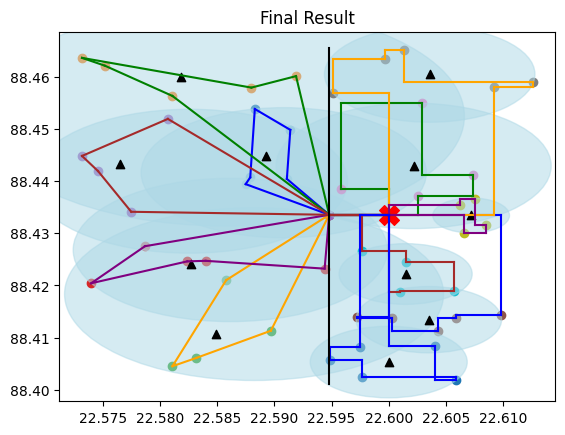

In [26]:
# Final Visualization
final_plot(euclidean_clusters, manhattan_clusters, border, centroids, dp)

## Calculate Total DIstance

In [ ]:
def total_distance(clusters):
    total = 0
    for i in clusters:
        pts = clusters[i]
        for j in range(len(pts)-1):
            total += calculate_distance(pts[j], pts[j+1])
    
    return total